<a href="https://colab.research.google.com/github/SujithVaddi1/gdp-analysis/blob/main/GDP_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# New section

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("world.csv")

In [ ]:
data

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [ ]:
data.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [ ]:
data.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,3
Infant mortality (per 1000 births),3
GDP ($ per capita),1
Literacy (%),18


In [ ]:
# Replace commas with periods and convert to numeric
cols_to_convert = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
                   'Net migration', 'Infant mortality (per 1000 births)',
                   'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
                   'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

for col in cols_to_convert:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Now try the groupby operation again
data.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [ ]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('Region')[col].median()
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]

In [ ]:
data.isnull().sum() # Confirming All Missing Values are Filled

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,0
Infant mortality (per 1000 births),0
GDP ($ per capita),0
Literacy (%),0


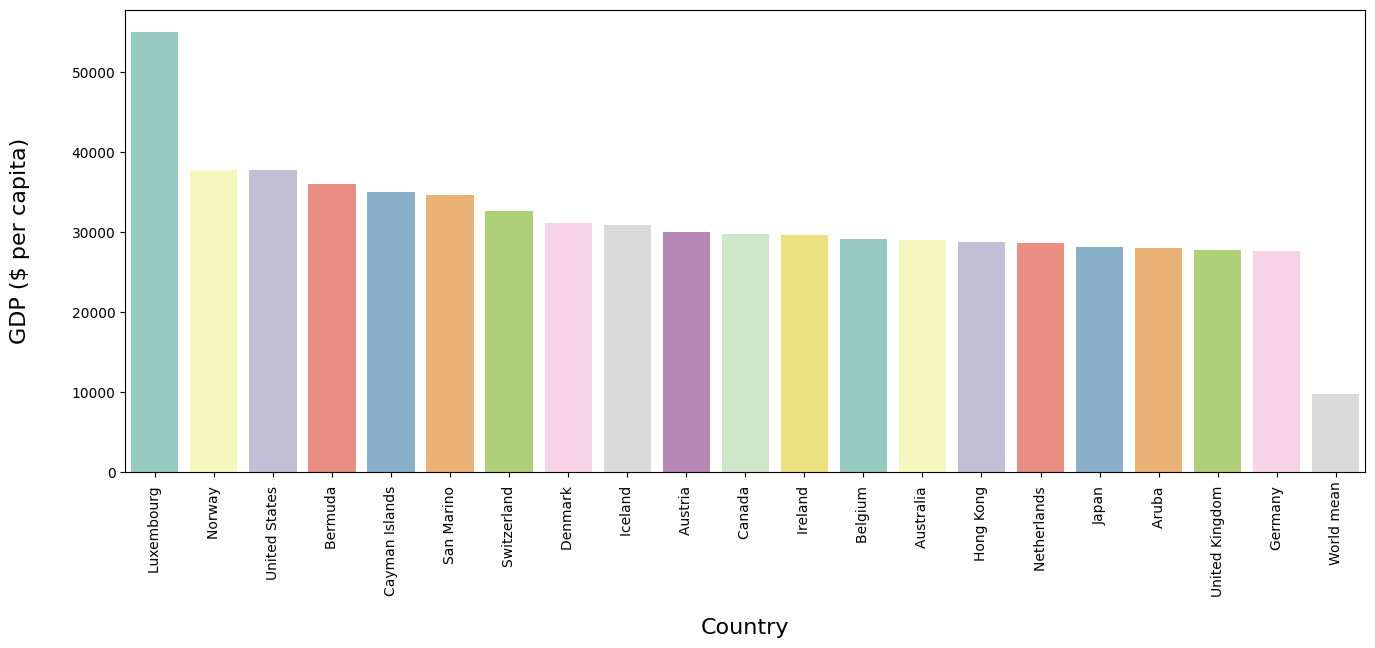

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = data.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)

sns.barplot(x='Country',y='GDP ($ per capita)',data=gdps, palette='Set3')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

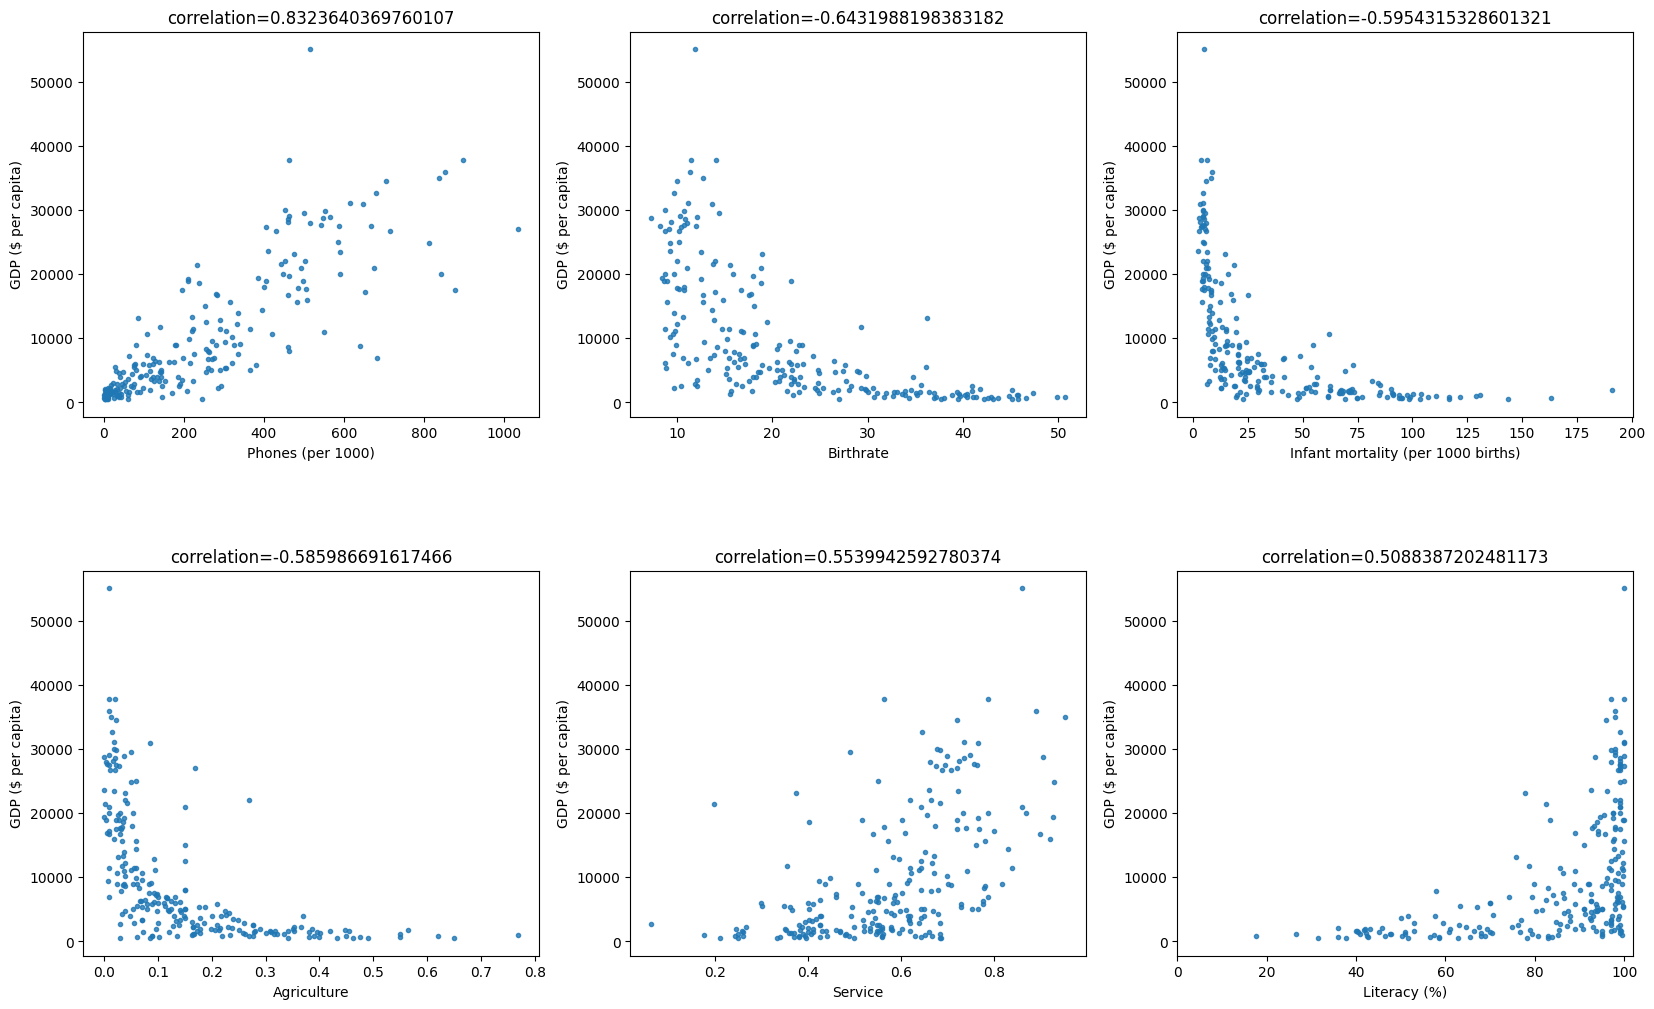

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [ ]:
data.loc[(data['Birthrate']<14)&(data['GDP ($ per capita)']<10000)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4,12.07,8.23,0.239,0.343,0.418
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4,11.16,14.02,0.093,0.316,0.591
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,98.6,215.4,13.60,2.96,83.44,4,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3,9.65,14.27,0.093,0.304,0.603
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,"1,5",13.25,6.97,0.125,0.473,0.403
51,Cuba,LATIN AMER. & CARIB,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,97.0,74.7,33.05,7.60,59.35,2,11.89,7.22,0.055,0.261,0.684
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3,10.41,9.23,0.172,0.275,0.553
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,98.6,260.0,22.26,1.81,75.93,3,12.02,8.77,0.118,0.319,0.563
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3,10.70,11.77,0.101,0.350,0.549
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,4,9.95,14.65,0.054,0.371,0.575


In [ ]:
LE = LabelEncoder()
data['Region_label'] = LE.fit_transform(data['Region'])
data['Climate_label'] = LE.fit_transform(data['Climate'])
data.sample()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
72,Gabon,SUB-SAHARAN AFRICA,1424906,267667,5.3,0.33,0.0,53.64,5500.0,63.2,...,0.66,98.08,2,36.16,12.25,0.061,0.592,0.348,9,2


In [ ]:
train, test = train_test_split(data, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Region_label',
       'Climate_label','Service']
train_X = train[training_features]
train_Y = train['GDP ($ per capita)']
test_X = test[training_features]
test_Y = test['GDP ($ per capita)']

In [ ]:
model1 = LinearRegression()
model1.fit(train_X, train_Y)
train_pred_Y = model1.predict(train_X)
test_pred_Y = model1.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 3961.3053294653714 msle_train: 5.582389408640675
rmse_test: 6551.14225737734 msle_test: 6.794345123128323


In [ ]:
# XGBoost Regressor

# Convert to NumPy arrays for XGBoost compatibility
model3 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model3.fit(train_X.values, train_Y.values)

train_pred3 = pd.Series(model3.predict(train_X.values).clip(0), index=train_Y.index)
test_pred3 = pd.Series(model3.predict(test_X.values).clip(0), index=test_Y.index)

print("\nXGBoost Regressor:")
print("Train RMSE:", np.sqrt(mean_squared_error(train_pred3, train_Y)))
print("Train MSLE:", mean_squared_log_error(train_pred3, train_Y))
print("Test RMSE:", np.sqrt(mean_squared_error(test_pred3, test_Y)))
print("Test MSLE:", mean_squared_log_error(test_pred3, test_Y))



XGBoost Regressor:
Train RMSE: 245.6394870117431
Train MSLE: 0.00946572536925675
Test RMSE: 5060.997326020752
Test MSLE: 0.33980565663087003


In [ ]:
# LSTM Model for GDP ($ per capita)

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define the target column
target = 'GDP ($ per capita)'

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data[training_features])
Y_scaled = data[[target]].values

# Reshape for LSTM input: (samples, timesteps, features)
X_seq = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train/test split
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, Y_scaled, test_size=0.3, random_state=42)

# Build LSTM model
model4 = Sequential()
model4.add(LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=False))
model4.add(Dropout(0.2))
model4.add(Dense(1))

# Compile and fit
model4.compile(optimizer='adam', loss='mean_squared_error')
model4.fit(X_train_seq, y_train_seq, epochs=100, batch_size=16, verbose=0)

# Predictions
y_train_pred_seq = model4.predict(X_train_seq).flatten()
y_test_pred_seq = model4.predict(X_test_seq).flatten()

# Evaluation
print("\nLSTM Model:")
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_pred_seq, y_train_seq)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_pred_seq, y_test_seq)))
train_msle = mean_squared_log_error(y_train_seq, y_train_pred_seq)
test_msle = mean_squared_log_error(y_test_seq, y_test_pred_seq)

print("Train MSLE:", train_msle)
print("Test MSLE:", test_msle)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

LSTM Model:
Train RMSE: 13928.237532666333
Test RMSE: 13745.504848449245
Train MSLE: 20.451061842448716
Test MSLE: 20.472695166261673


In [ ]:
model2 = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model2.fit(train_X, train_Y)
train_pred_Y = model2.predict(train_X)
test_pred_Y = model2.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 2592.207151448562 msle_train: 0.15650878863062012
rmse_test: 5120.497857101877 msle_test: 0.29236173651997305


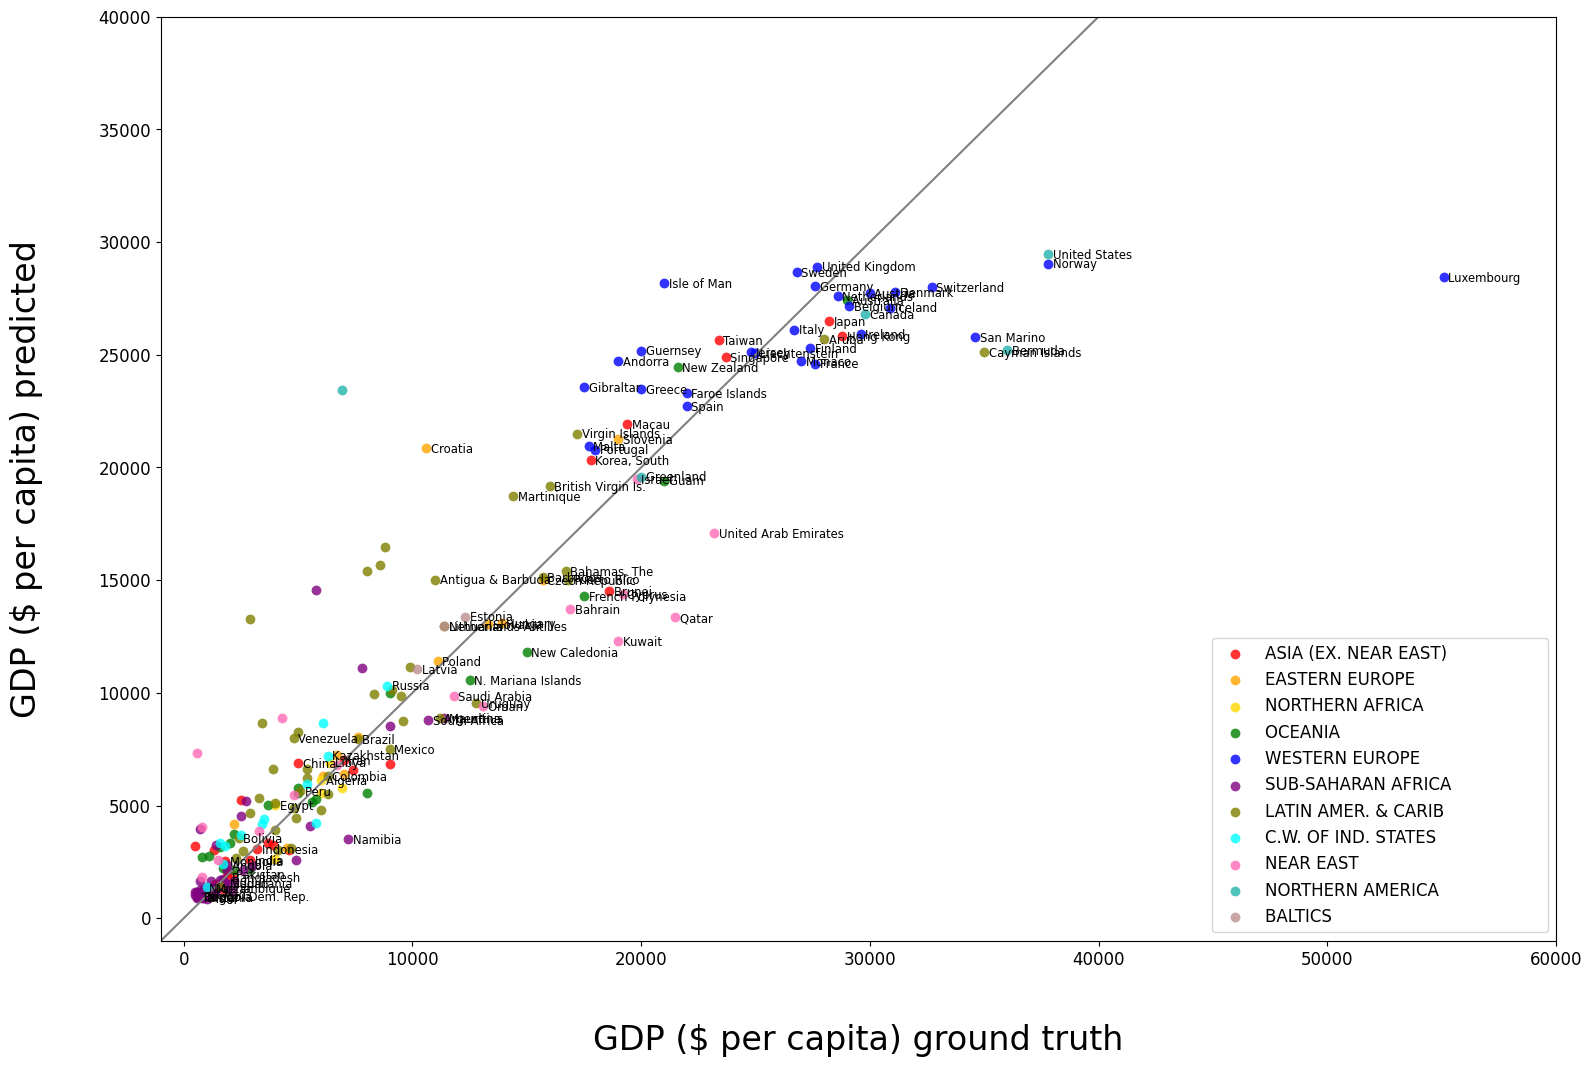

In [ ]:
plt.figure(figsize=(18,12))

train_test_Y = pd.concat([train_Y, test_Y])
train_test_pred_Y = pd.concat([train_pred_Y, test_pred_Y])

data_shuffled = data.loc[train_test_Y.index]
label = data_shuffled['Country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffled['Region']==region]
    Y = train_test_pred_Y.loc[data_shuffled['Region']==region]
    ax = sns.regplot(x=X, y=Y, marker='.', fit_reg=False, color=color, scatter_kws={'s':200, 'linewidths':0}, label=region)
plt.legend(loc=4,prop={'size': 12})

ax.set_xlabel('GDP ($ per capita) ground truth',labelpad=40)
ax.set_ylabel('GDP ($ per capita) predicted',labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,50000,100) # 100 linearly spaced numbers
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffled['Area (sq. mi.)'].iloc[i]>8e5) |
       (data_shuffled['Population'].iloc[i]>1e8) |
       (data_shuffled['GDP ($ per capita)'].iloc[i]>10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200, label.iloc[i], size='small')

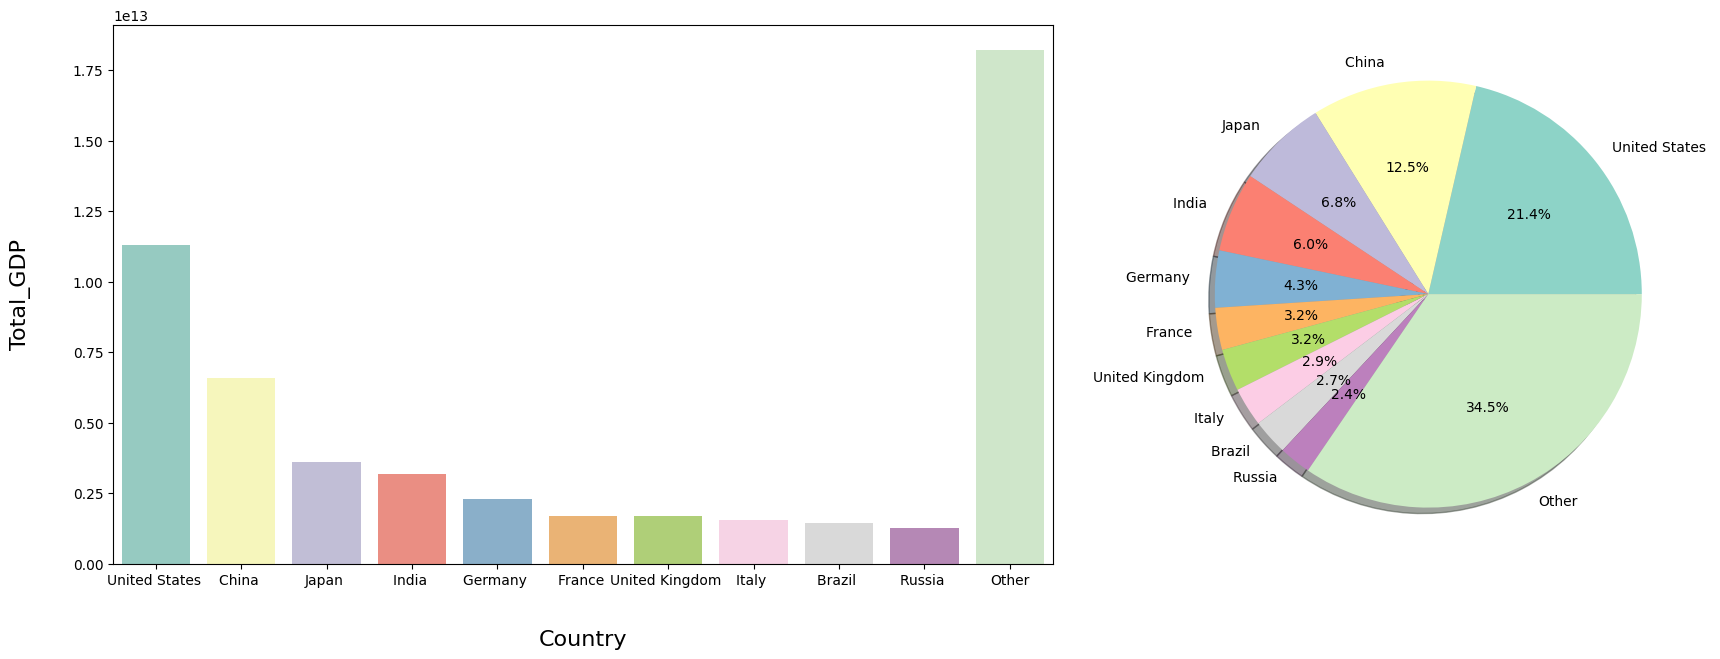

In [ ]:
data['Total_GDP ($)'] = data['GDP ($ per capita)'] * data['Population']
top_gdp_countries = data.sort_values('Total_GDP ($)',ascending=False).head(10)
other = pd.DataFrame({'Country':['Other'], 'Total_GDP ($)':[data['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country','Total_GDP ($)']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7),gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='Country',y='Total_GDP ($)',data=gdps,ax=axes[0],palette='Set3')
axes[0].set_xlabel('Country',labelpad=30,fontsize=16)
axes[0].set_ylabel('Total_GDP',labelpad=30,fontsize=16)

colors = sns.color_palette("Set3", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')
plt.show()

In [ ]:
Rank1 = data[['Country','Total_GDP ($)']].sort_values('Total_GDP ($)', ascending=False).reset_index()
Rank2 = data[['Country','GDP ($ per capita)']].sort_values('GDP ($ per capita)', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.Country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.Country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('Rank of total GDP - Rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.Country]

Rank of total GDP - Rank of GDP per capita:


,0
Country,
United States,2
China,120
Japan,14
India,145
Germany,15
France,15
United Kingdom,12
Italy,17
Brazil,84


In [ ]:
corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='Total_GDP ($)')&(col!='Climate')&(col!='GDP ($ per capita)')):
        corr_to_gdp[col] = data['Total_GDP ($)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

Population                            0.639528
Area (sq. mi.)                        0.556396
Phones (per 1000)                     0.233484
Birthrate                            -0.166889
Agriculture                          -0.139516
Arable (%)                            0.129928
Climate_label                         0.125791
Infant mortality (per 1000 births)   -0.122076
Literacy (%)                          0.099417
Service                               0.085096
Region_label                         -0.079745
Crops (%)                            -0.077078
Coastline (coast/area ratio)         -0.065211
Other (%)                            -0.064882
Net migration                         0.054632
Industry                              0.050399
Deathrate                            -0.035820
Pop. Density (per sq. mi.)           -0.028487
dtype: float64


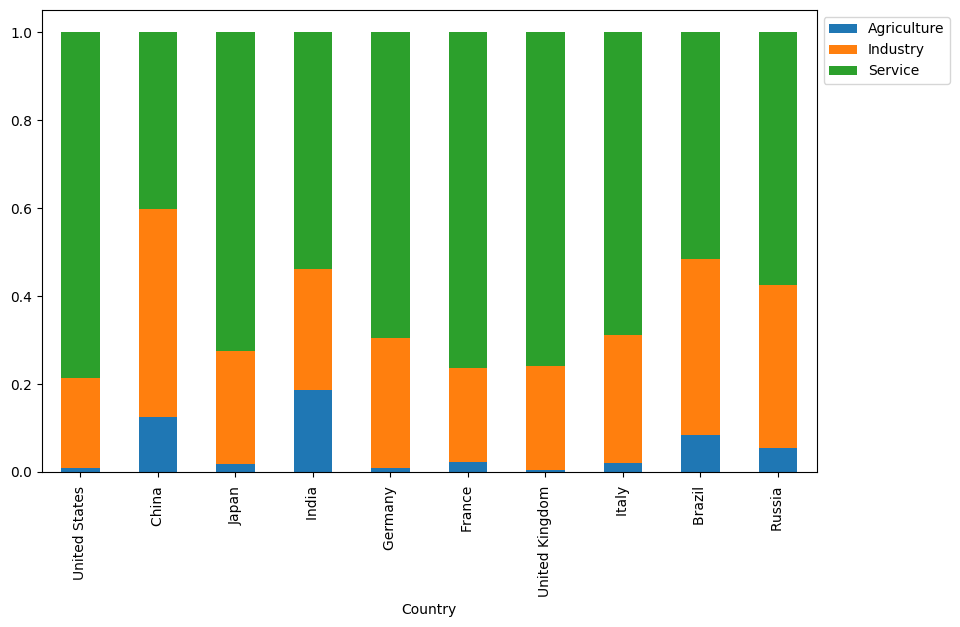

In [ ]:
plot_data = top_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

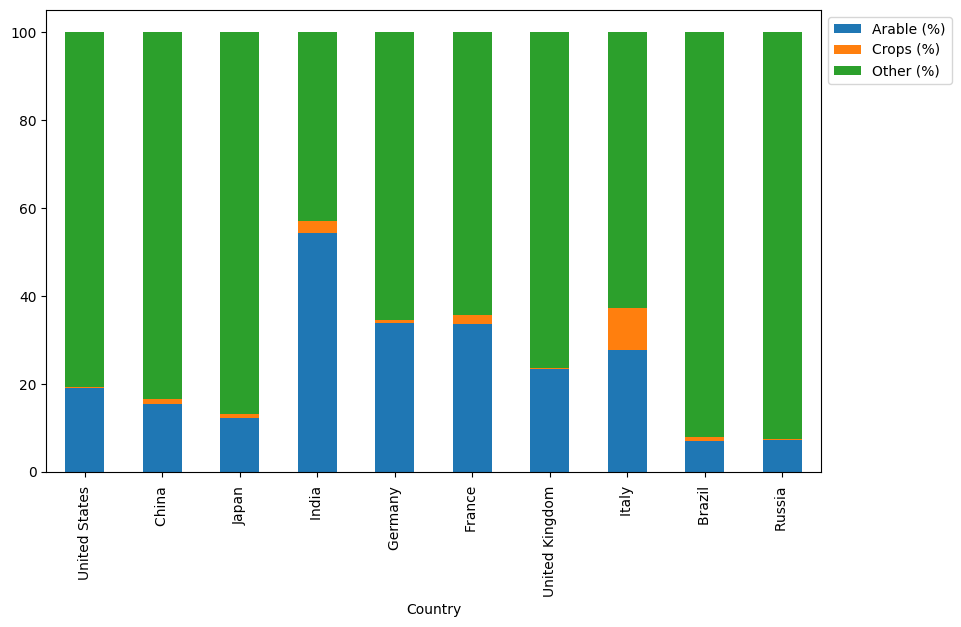

In [ ]:
plot_data = top_gdp_countries[['Country','Arable (%)', 'Crops (%)', 'Other (%)']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming you have the train_gdp from training data
train_gdp = np.array([25000, 27000, 29000, 31000, 33000])  # Replace with actual GDP values

# Fit target scaler using the training GDP values
target_scaler = MinMaxScaler()
target_scaler.fit(train_gdp.reshape(-1, 1))

# Sample feature set for 2024 and 2025
raw_future_data = {
    'Population': [15000000, 15200000],
    'Area (sq. mi.)': [500000, 500000],
    'Pop. Density (per sq. mi.)': [30.0, 30.4],
    'Coastline (coast/area ratio)': [0.5, 0.5],
    'Net migration': [1.5, 1.6],
    'Infant mortality (per 1000 births)': [10.0, 9.5],
    'Literacy (%)': [95.0, 95.2],
    'Phones (per 1000)': [800, 820],
    'Arable (%)': [20.0, 20.2],
    'Crops (%)': [5.0, 5.0],
    'Other (%)': [75.0, 74.8],
    'Birthrate': [12.0, 11.8],
    'Deathrate': [8.0, 7.9],
    'Agriculture': [0.2, 0.19],
    'Industry': [0.3, 0.31],
    'Service': [0.5, 0.5],
    'Region_label': [3, 3],
    'Climate_label': [1, 1]
}

# Create DataFrame and align feature order for scaling
future_data = pd.DataFrame(raw_future_data)
future_data = future_data[scaler.feature_names_in_]  # Ensure correct order for scaler

# Scale features
future_scaled = scaler.transform(future_data)

# Reshape for LSTM
future_seq = future_scaled.reshape((future_scaled.shape[0], 1, future_scaled.shape[1]))

# Get predictions from each model
xgb_pred = model3.predict(future_data.values)
lstm_pred_scaled = model4.predict(future_seq)

# Inverse transform LSTM predictions
lstm_pred = target_scaler.inverse_transform(lstm_pred_scaled).flatten()

# Final Output
print("Linear Regression Prediction:", model1.predict(future_data))
print("Random Forest Prediction:", model2.predict(future_data))
print("XGBoost Prediction:", xgb_pred)
print("LSTM Prediction (Inverse Transformed):", lstm_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Linear Regression Prediction: [30008.22276263 30777.99407636]
Random Forest Prediction: [16012.56338106 16119.56338106]
XGBoost Prediction: [20439.299 20439.299]
LSTM Prediction (Inverse Transformed): [551600.06 551651.9 ]
